In [1]:
import numpy as np
from numpy import apply_along_axis, meshgrid, arange, vstack
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches

# Function whose level-sets we are interested in
f = lambda x: x[1]**2 + 3*(x[0]**2)*(x[0]**2 - 1)
f_broadcasted = lambda x: apply_along_axis(f, 1, x)

# Generate grid of (x, y, z) values to plot contour
xlims, ylims = [-2, 2], [-2, 2]
step = 0.005
x, y = meshgrid(arange(*xlims, step), arange(*ylims, step))
xys = vstack((x.flatten(), y.flatten())).T
z = f_broadcasted(xys).reshape(x.shape)

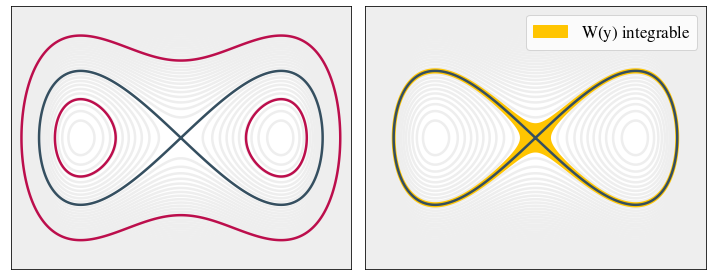

In [9]:
# Plot settings
LEVELS = np.arange(-0.7, 5, 0.07)
BACKGROUND_COLOR = '#EEEEEE'
FILLED_COLOR = '#FFC501'
MANIFOLD_COLOR = '#354F60'
DIFFERENT_MANIFOLD_COLOR = '#BC0E4C'
LINEWIDTH=2.5
rc('font',**{'family':'STIXGeneral'})

fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True, sharey=True)
# Display manifold of interest and two "wrong" ones.
ax[0].contour(x, y, z, levels=LEVELS, colors=BACKGROUND_COLOR, linestyles='-', zorder=-1, linewidths=LINEWIDTH)
ax[0].contour(x, y, z, levels=[0.0], colors=MANIFOLD_COLOR, linestyles='-', linewidths=LINEWIDTH)
ax[0].contour(x, y, z, levels=[-0.5, 1.0], colors=DIFFERENT_MANIFOLD_COLOR, linestyles='-', linewidths=LINEWIDTH)
# Plot region where W(y) is integrable
R0 = 0.03
ax[1].contour(x, y, z, levels=LEVELS, colors=BACKGROUND_COLOR, linestyles='-', zorder=-1, linewidths=LINEWIDTH)
ax[1].contourf(x, y, z, levels=[-R0, R0], colors=FILLED_COLOR)
ax[1].contour(x, y, z, levels=[-R0, R0], colors=FILLED_COLOR, linestyles='-', linewidths=LINEWIDTH)
ax[1].contour(x, y, z, levels=[0.0], colors=MANIFOLD_COLOR, linestyles='-', linewidths=LINEWIDTH)
for i in range(2):
    ax[i].set_xlim([-1.2, 1.2])
    ax[i].set_ylim([-1.7, 1.7])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ocra_patch = mpatches.Patch(color=FILLED_COLOR, label=r'$\mathregular{W(y)}$ integrable')
plt.legend(handles=[ocra_patch], fontsize=17)
plt.tight_layout()
plt.savefig('figures/plot_proof_convergence_filamentary.png', dpi=800)
plt.show()